In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import datetime
from pandas_datareader import data, wb

In [4]:
start = datetime.date(2012, 3, 25)
end = datetime.date.today()

In [5]:
df = data.DataReader('AAPL', 'yahoo', start, end)

In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2)#segment 80% training and 20% testing

In [7]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-26,599.790016,607.150024,595.259979,606.979980,148935500,78.640054
2012-03-27,606.180016,616.280006,606.060013,614.480019,151782400,79.611755
2012-03-28,618.379974,621.450005,610.309990,617.620010,163865100,80.018571
2012-03-29,612.780006,616.560013,607.230026,609.859993,152059600,79.013187
2012-03-30,608.769981,610.559982,597.939987,599.550011,182759500,77.677430


In [8]:
df["STOK"]=(df["Close"]-df["Low"].min())/(df["High"].max()-df["Low"].min())*100#Adding feature Stochastic %K

In [9]:
df.head()

,Open,High,Low,Close,Volume,Adj Close,STOK
Date,,,,,,,
2012-03-26,599.790016,607.150024,595.259979,606.979980,148935500,78.640054,84.065946
2012-03-27,606.180016,616.280006,606.060013,614.480019,151782400,79.611755,85.284275
2012-03-28,618.379974,621.450005,610.309990,617.620010,163865100,80.018571,85.794345
2012-03-29,612.780006,616.560013,607.230026,609.859993,152059600,79.013187,84.533784
2012-03-30,608.769981,610.559982,597.939987,599.550011,182759500,77.677430,82.858998


In [10]:
import matplotlib
import matplotlib.pyplot as plt

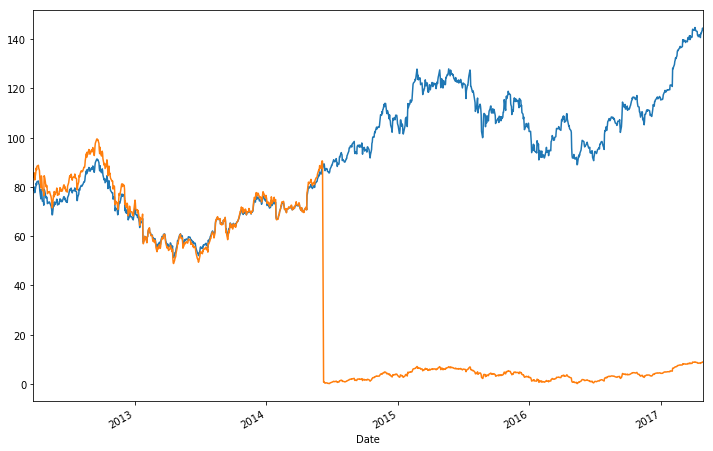

In [11]:
df["Adj Close"].plot(figsize=(12,8))
df["STOK"].plot(figsize=(12,8))
plt.show()#Visualizing feature STOK with price

In [12]:
df["AO Oscillator"]=(df["High"]-df["Close"].shift(1))/(df["High"]-df["Low"])#Feature 2 from Indicator Type 1

In [13]:
df.head()

,Open,High,Low,Close,Volume,Adj Close,STOK,AO Oscillator
Date,,,,,,,,
2012-03-26,599.790016,607.150024,595.259979,606.979980,148935500,78.640054,84.065946,NaN
2012-03-27,606.180016,616.280006,606.060013,614.480019,151782400,79.611755,85.284275,0.909984
2012-03-28,618.379974,621.450005,610.309990,617.620010,163865100,80.018571,85.794345,0.625671
2012-03-29,612.780006,616.560013,607.230026,609.859993,152059600,79.013187,84.533784,-0.113612
2012-03-30,608.769981,610.559982,597.939987,599.550011,182759500,77.677430,82.858998,0.055467


In [14]:
df.fillna(0, inplace=True)

In [15]:
df.head()

,Open,High,Low,Close,Volume,Adj Close,STOK,AO Oscillator
Date,,,,,,,,
2012-03-26,599.790016,607.150024,595.259979,606.979980,148935500,78.640054,84.065946,0.000000
2012-03-27,606.180016,616.280006,606.060013,614.480019,151782400,79.611755,85.284275,0.909984
2012-03-28,618.379974,621.450005,610.309990,617.620010,163865100,80.018571,85.794345,0.625671
2012-03-29,612.780006,616.560013,607.230026,609.859993,152059600,79.013187,84.533784,-0.113612
2012-03-30,608.769981,610.559982,597.939987,599.550011,182759500,77.677430,82.858998,0.055467


In [16]:
df["LW%R"]=(df["High"].max()-df["Close"])/(df["High"].max()-df["Low"].min())*100# Feature 3,Larry William’s %R from Type 1

In [17]:
df.head()

,Open,High,Low,Close,Volume,Adj Close,STOK,AO Oscillator,LW%R
Date,,,,,,,,,
2012-03-26,599.790016,607.150024,595.259979,606.979980,148935500,78.640054,84.065946,0.000000,15.934054
2012-03-27,606.180016,616.280006,606.060013,614.480019,151782400,79.611755,85.284275,0.909984,14.715725
2012-03-28,618.379974,621.450005,610.309990,617.620010,163865100,80.018571,85.794345,0.625671,14.205655
2012-03-29,612.780006,616.560013,607.230026,609.859993,152059600,79.013187,84.533784,-0.113612,15.466216
2012-03-30,608.769981,610.559982,597.939987,599.550011,182759500,77.677430,82.858998,0.055467,17.141002


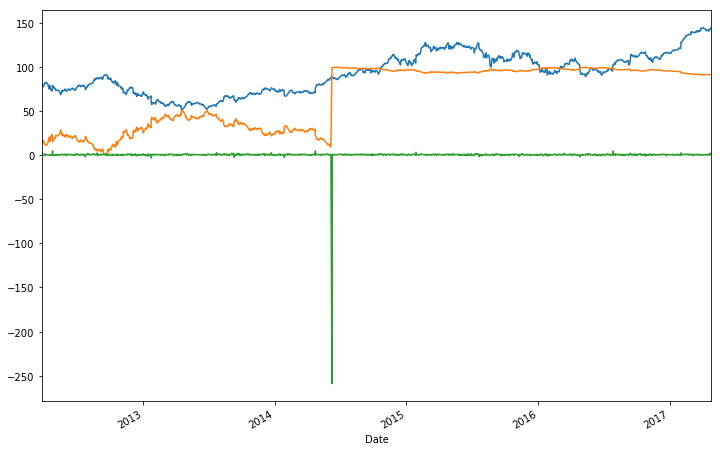

In [18]:
df["Adj Close"].plot(figsize=(12,8))
df["LW%R"].plot(figsize=(12,8))
df["AO Oscillator"].plot(figsize=(12,8))
plt.show()# Visualizing in the graph

In [19]:
df["ASY1"]= ((np.log(df["Close"])- np.log(df["Close"].shift(1)))*100).shift(1)# Feature ASY1 from Type 2 Indicator

In [20]:
df.head()

,Open,High,Low,Close,Volume,Adj Close,STOK,AO Oscillator,LW%R,ASY1
Date,,,,,,,,,,
2012-03-26,599.790016,607.150024,595.259979,606.979980,148935500,78.640054,84.065946,0.000000,15.934054,NaN
2012-03-27,606.180016,616.280006,606.060013,614.480019,151782400,79.611755,85.284275,0.909984,14.715725,NaN
2012-03-28,618.379974,621.450005,610.309990,617.620010,163865100,80.018571,85.794345,0.625671,14.205655,1.228060
2012-03-29,612.780006,616.560013,607.230026,609.859993,152059600,79.013187,84.533784,-0.113612,15.466216,0.509699
2012-03-30,608.769981,610.559982,597.939987,599.550011,182759500,77.677430,82.858998,0.055467,17.141002,-1.264399


In [21]:
# Drop the NaN values
df = df.dropna()

In [22]:
df["ASY2"]=(1/ np.log(df["Close"].shift(2)) - (1/np.log(df["Close"].shift(3))))*100# Feature ASY2 from Type 2 Indicator

In [23]:
df.head()

,Open,High,Low,Close,Volume,Adj Close,STOK,AO Oscillator,LW%R,ASY1,ASY2
Date,,,,,,,,,,,
2012-03-28,618.379974,621.450005,610.309990,617.620010,163865100,80.018571,85.794345,0.625671,14.205655,1.228060,NaN
2012-03-29,612.780006,616.560013,607.230026,609.859993,152059600,79.013187,84.533784,-0.113612,15.466216,0.509699,NaN
2012-03-30,608.769981,610.559982,597.939987,599.550011,182759500,77.677430,82.858998,0.055467,17.141002,-1.264399,NaN
2012-04-02,601.830009,618.769997,600.379990,618.630020,149587900,80.149428,85.958415,1.045132,14.041585,-1.705002,0.030681
2012-04-03,627.300018,632.209984,622.510002,629.319984,208639900,81.534415,87.694926,1.399999,12.305074,3.132800,0.041565


In [24]:
df.fillna(0, inplace=True)

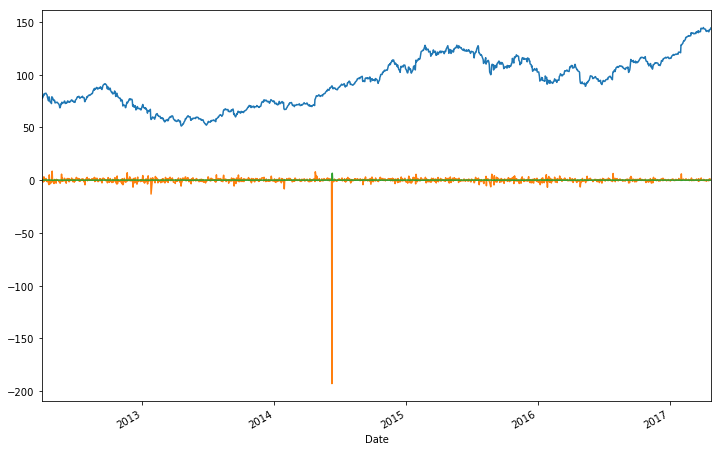

In [25]:
df["Adj Close"].plot(figsize=(12,8))
df["ASY1"].plot(figsize=(12,8))
df["ASY2"].plot(figsize=(12,8))
plt.show()

In [27]:
df["OBV"] = np.where(df["Close"]>df["Close"].shift(1), df["Volume"].cumsum(), df["Volume"])# feature OBV from Type2 Indicator 

In [28]:
df.head()

,Open,High,Low,Close,Volume,Adj Close,STOK,AO Oscillator,LW%R,ASY1,ASY2,OBV
Date,,,,,,,,,,,,
2012-03-28,618.379974,621.450005,610.309990,617.620010,163865100,80.018571,85.794345,0.625671,14.205655,1.228060,0.000000,163865100
2012-03-29,612.780006,616.560013,607.230026,609.859993,152059600,79.013187,84.533784,-0.113612,15.466216,0.509699,0.000000,152059600
2012-03-30,608.769981,610.559982,597.939987,599.550011,182759500,77.677430,82.858998,0.055467,17.141002,-1.264399,0.000000,182759500
2012-04-02,601.830009,618.769997,600.379990,618.630020,149587900,80.149428,85.958415,1.045132,14.041585,-1.705002,0.030681,648272100
2012-04-03,627.300018,632.209984,622.510002,629.319984,208639900,81.534415,87.694926,1.399999,12.305074,3.132800,0.041565,856912000


In [29]:
df["Trade"] = np.where(df["STOK"]>=84, 'buy', 'sell')# decision designing with STOK,if STOK >=84, buy else sell

In [30]:
df.head()

,Open,High,Low,Close,Volume,Adj Close,STOK,AO Oscillator,LW%R,ASY1,ASY2,OBV,Trade
Date,,,,,,,,,,,,,
2012-03-28,618.379974,621.450005,610.309990,617.620010,163865100,80.018571,85.794345,0.625671,14.205655,1.228060,0.000000,163865100,buy
2012-03-29,612.780006,616.560013,607.230026,609.859993,152059600,79.013187,84.533784,-0.113612,15.466216,0.509699,0.000000,152059600,buy
2012-03-30,608.769981,610.559982,597.939987,599.550011,182759500,77.677430,82.858998,0.055467,17.141002,-1.264399,0.000000,182759500,sell
2012-04-02,601.830009,618.769997,600.379990,618.630020,149587900,80.149428,85.958415,1.045132,14.041585,-1.705002,0.030681,648272100,buy
2012-04-03,627.300018,632.209984,622.510002,629.319984,208639900,81.534415,87.694926,1.399999,12.305074,3.132800,0.041565,856912000,buy


In [31]:
# Create feature from Close from previous day
# and Label from next day
df['Close-1'] = df["Close"].shift(1)
df['Label'] = df["Close"].shift(-1)

In [32]:
# Drop the columns we dont want to use as features
df.drop(["Open", "High", "Low", "Volume", "Adj Close", "Trade"], axis=1, inplace=True)

In [33]:
df.tail(5)

,Close,STOK,AO Oscillator,LW%R,ASY1,ASY2,OBV,Close-1,Label
Date,,,,,,,,,
2017-04-20,142.440002,8.604613,1.272734,91.395387,-0.368955,0.018151,91262993600,140.679993,142.270004
2017-04-21,142.270004,8.576998,0.289150,91.423002,1.243311,0.015068,17245200,142.440002,143.639999
2017-04-24,143.639999,8.799545,2.181798,91.200455,-0.119418,-0.050687,91297338000,142.270004,144.529999
2017-04-25,144.529999,8.944119,1.223297,91.055881,0.958347,0.004857,91315628300,143.639999,143.679993
2017-04-26,143.679993,8.806041,0.057383,91.193959,0.617693,-0.038915,19769400,144.529999,NaN


In [34]:
# Drop the NaN values
df = df.dropna()

In [35]:
from sklearn import preprocessing

In [36]:
X = np.array(df.drop(['Label'], 1))
# Scale values with zero mean and unit variance 
X = preprocessing.scale(X)

C:\Users\Omistaja\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [37]:
# Labels
y = np.array(df['Label'])
# Scale values with zero mean and unit variance 
y = preprocessing.scale(y)

In [38]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, ElasticNetCV, Ridge
from sklearn.model_selection import TimeSeriesSplit

In [39]:
tscv = TimeSeriesSplit(n_splits=4)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [40]:
X_test[:5]

array([[-0.8788264 , -0.8788264 , -0.06738341,  0.8788264 ,  0.056656  ,
         0.1073779 , -0.86784938, -0.87450818],
       [-0.88018491, -0.88018491, -0.01029348,  0.88018491, -0.17287251,
        -0.06749459, -0.86778766, -0.87993832],
       [-0.8829956 , -0.8829956 , -0.05153032,  0.8829956 , -0.02839807,
         0.24011954, -0.86795138, -0.88129587],
       [-0.88641531, -0.88641531, -0.02620048,  0.88641531, -0.08077275,
         0.04662724, -0.86714066, -0.88410457],
       [-0.91700507, -0.91700507, -0.30334533,  0.91700507, -0.10343179,
         0.11729217, -0.86544342, -0.88752184]])

In [41]:
close_values = X_test[:,0]

In [42]:
linear = LinearRegression()

In [43]:
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
forecast_set = linear.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

def evaluate(close_values, predicted_values, true_values):
    """Print MSE, a confusion matrix and prediction (up/down) accuracy."""
    
    MSE = mean_squared_error(predicted_values, true_values)
    
    true = []
    pred = []
    
    # Compares predicted and true values to the previous day data to see 
    # if the prediction direction was correct
    for i in range(len(predicted_values)): 
        if (predicted_values[i] > close_values[i]):
            pred.append(1)
        else:
            pred.append(0)
        if (true_values[i] > close_values[i]):
            true.append(1)
        else:
            true.append(0)
    
    # How many of our predictions were correct
    matches = 0
    for i in range(len(pred)):
        if pred[i] == true[i]:
            matches += 1
            
    percentage = (matches / len(pred)) * 100
    
    print("MSE:", MSE, "\n")
    print("Confusion matrix:\n", confusion_matrix(true, pred), "\n")
    print(matches, "correct out of", len(pred))
    print("Accuracy:", percentage, "%\n")
    

In [46]:
evaluate(close_values, forecast_set, y_test)

MSE: 4.38324307153e-05 

Confusion matrix:
 [[  0  84]
 [  0 171]] 

171 correct out of 255
Accuracy: 67.05882352941175 %

